# Exploring Liver Disease with Machine Learning
Written by UbuntuZar 01/10/2020

# I) Familiarizing ourselves with the data

In [1]:
# Import the data processing and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

%matplotlib inline

In [2]:
# Read the dataset in pandas
df_liver = pd.read_csv('D:\\Project 2020\\Indian Liver Patient Dataset (ILPD).csv')

In [3]:
# Access the first 5 rows of df_liver
df_liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Access the last 5 rows of df_liver
df_liver.tail()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
# Retrieve the colunmn information
df_liver.columns.values

array(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin',
       'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos',
       'is_patient'], dtype=object)

In [6]:
# Retrieve the full information of df_liver regarding the features and response, in order to verify 
# if the values are unique or are there any missing data.
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
# Find the shape of the datframe df_liver
df_liver.shape

(583, 11)

What we can see here is that the data contains (583 rows by 11 columns). This means the that df_liver contains 583 observations + 10 features + 1 response (or target) variable. The response variable is "Dataset". Furthermore, df_liver consists of 5 Floats, 5 integers and 1 object. Therefore, the goal is to convert the object to numerical values so we can apply machine learning (ML) algorithms. We also notice that the column, 'Albumin_and_Globulin_Ratio' contains missing values (Nan).


In [8]:
# We can performing some simple statistical inferences to get a good feel of the data
df_liver.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


From the descriptive statistics above, we notice that the minimum age is 4 and the maximum is 90. Based on the information on this dataset, it was suggested that anyone above the age of 85 should be treated as 90. So we can change that through the creation of a new dataframe. Furthermore, we notice missing values in the column "Albumin_and_Globulin_Ratio", which we can deal with shortly. Lastly, it would be a good idea to figure out the ranges of healthy patients in order to figure out where each patient lies.


# II) Cleaning the data

# a) Healthy ranges of the feature results

Healthy Ranges for the 10 feature columns

Total_Bilirubin = 0.1 to 1.2 mg/dL = 1.71 to 20.5 umol/L

Direct_Bilirubin = < 0.3 mg/dL = < 5.1 umol/L

Alkaline_Phosphatase = 44 to 147 IU/L (High levels of ALP are seen in children undergoing growth and pregnant women)

Alamine_Aminotransferase = 29 to 33 IU/L (Age and gender can affect the value)

Aspartate_Aminotransferase = 1 to 45 U/L (Values are slightly lower in females) Total_Proteins = 6.0 to 8.3 g/dL

Albumin = 3.4 to 5.4 g/dL

Albumin_and_Globulin_Ratio = Adult: 3.7 to 5.2 g/dL; Older Adult: 3.2 to 4.6 g/dL; >90 yr: 2.9 to 4.5 g/dL

Note: These values may differ based on the different guidelines or hospitals. The values above were obtained from google.


# b) Dealing with missing values

In [9]:
# I can quickly perform some additional statistics to include all
df_liver.describe(include ='all')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [10]:
# Define a function that allows us to create a table of missing values in df_liver and their percentages in 
# descending order
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percentage_final = (round(percentage, 2) * 100)
    total_percent = pd.concat(objs=[total, percentage_final], axis = 1, keys=['Total', '%'])
    return total_percent

In [11]:
# Find the total count and % of missing values 
missing_values(df_liver)

,Total,%
alkphos,4,1.0
is_patient,0,0.0
sgot,0,0.0
sgpt,0,0.0
ag_ratio,0,0.0
albumin,0,0.0
tot_proteins,0,0.0
direct_bilirubin,0,0.0
tot_bilirubin,0,0.0
gender,0,0.0


It appears that there are only 4 missing values in the feture column Albumin_and_Globulin_Ratio, which equates to 1% of the the entire data.

In [12]:
# Replace missing values with the mean of feature column Albumin_and_Globulin_Ratio, 
# then check to see that it has been successfull, where the sum of missig values should be 0
df_liver['alkphos'].fillna(df_liver['alkphos'].mean(), inplace = True)
df_liver['alkphos'].isnull().sum()

0

In [13]:
# Repeat to see what is the % of missing values
missing_values(df_liver)

,Total,%
is_patient,0,0.0
alkphos,0,0.0
sgot,0,0.0
sgpt,0,0.0
ag_ratio,0,0.0
albumin,0,0.0
tot_proteins,0,0.0
direct_bilirubin,0,0.0
tot_bilirubin,0,0.0
gender,0,0.0


# c) Exploring the data visually

Let's try to find any correlations between the features. Here I will use pairplot in seaborn.

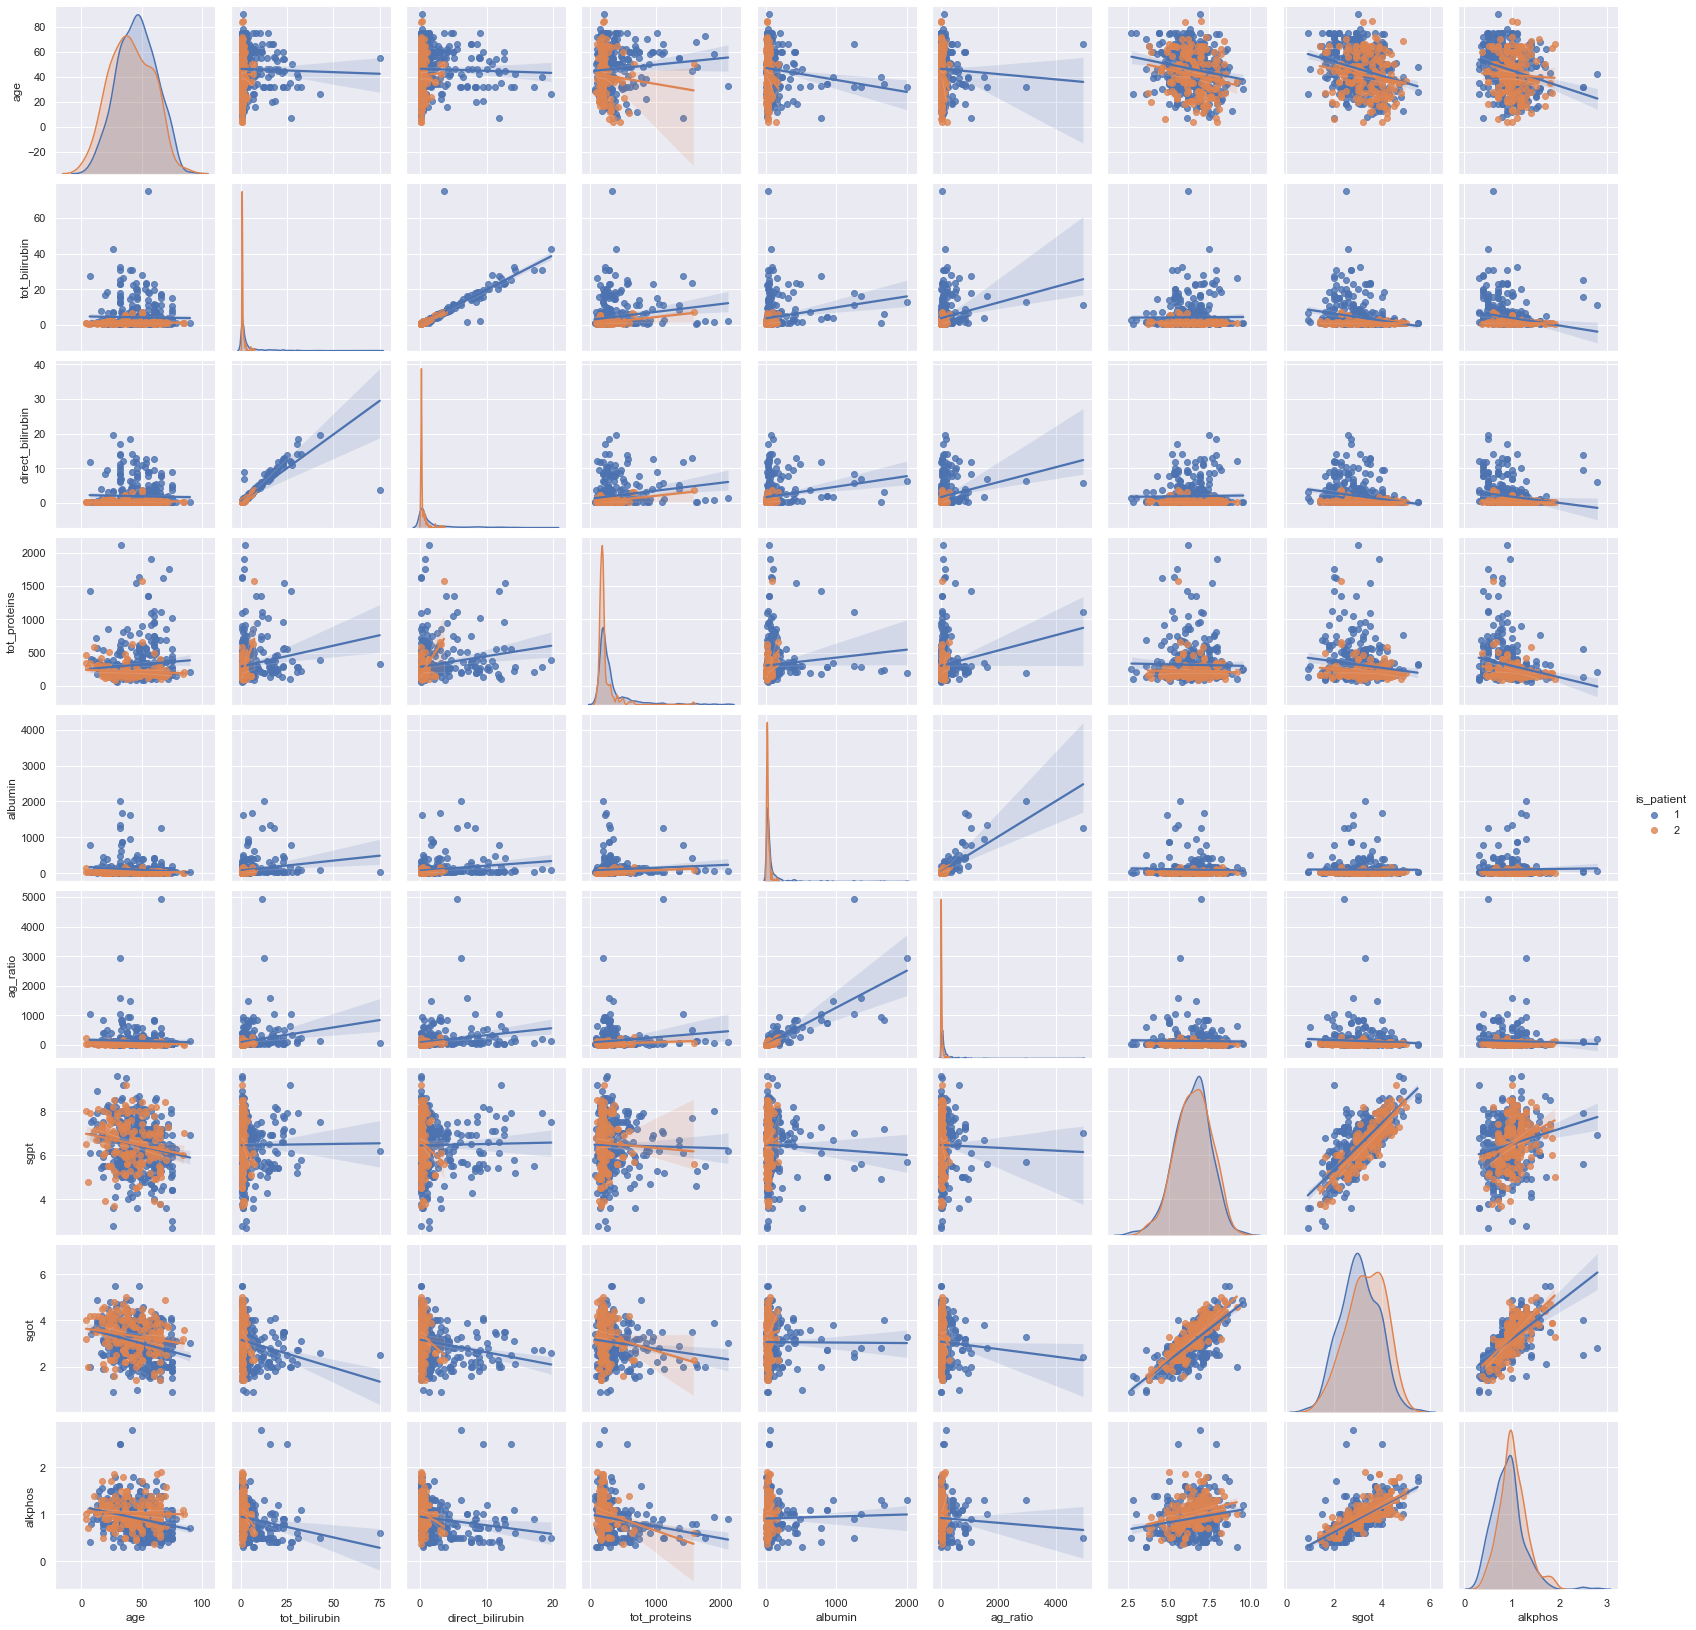

In [14]:
# Correlation pairplot
sns.set()
sns.pairplot(df_liver, hue='is_patient', kind='reg')

Based on the correlative pair plots, we find some interesting results directly.

-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

Total Protein and Albumin and Globulin Ration (vice-versa)

-Negative correlations:

Total Protein and age (vice-versa)

Albumin and age (vice-versa)

Albumin and Globulin Ration and age (vice-versa)


In [15]:
# A more robust way of figuring out correlations other than observations as above is to generate a full correlation
# table with the ranging from -1 to 1
df_liver.corr().style.background_gradient(cmap='coolwarm')

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
tot_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
tot_proteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
ag_ratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
sgpt,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
sgot,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
alkphos,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
is_patient,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


The above correlation heatmap demonstrates strong positive (closer to 1) and negative correlations (closer to -1) but also weak positive and negative correlations (closer to zero). Next, let us plot some of these features as a function of gender in order to determine whether gender effects the target feature and the concentration levels of some of those feautures, which are deterministic of liver disease. However, before doing so we need to change the gender to numerical values.


In [16]:
# Change the current categorical feature Gender to a numerical feature of 0 or 1 (as ML algorithms prefer numerical 
# features)
df_liver['gender'] = df_liver['gender'].map({'Male': 1, 'Female': 0})
# Alternatively, you can use the apply and lambda function
# df_liver['Gender'] = df_liver['Gender'].apply(lambda x:1 if x == 'Male' else 0)

# Check to make sure that the gender has been correctly converted
df_liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


(0.0, 700.0)

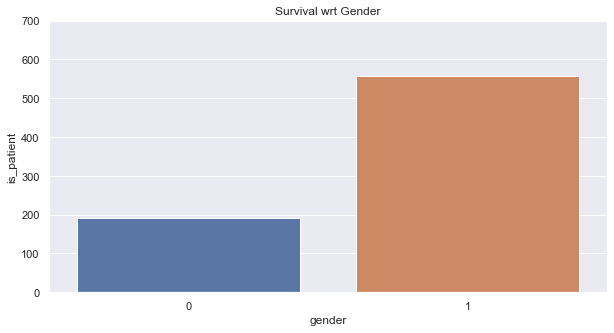

In [17]:
# Create a table for Dataset (with and without liver disease) and gender
df_liver_Gender = round(df_liver[['gender', 'is_patient']].groupby(['gender'], as_index=False).agg(np.sum), 3)

# Generate plot to determine the effect of gender on the dataset (target feature)
# Figure configuration
plt.figure(figsize=(10,5))

sns.barplot(x="gender", y="is_patient", data=df_liver_Gender, ci=None)
plt.title("Survival wrt Gender")
plt.ylim(0, 700)

In [18]:
# Create a table for Dataset (with and without liver disease) and Albumin
df_liver_albumin = round(df_liver[['gender', 'albumin', 'is_patient']]
                         .groupby(['albumin', 'gender'], as_index=False).agg(np.sum), 1)

# Generate plot to determine the effect of gender on the dataset (target feature) and Albumin
# Figure configuration
plt.figure(figsize=(18,10))

sns.barplot(x="albumin", y="is_patient", hue='gender', data=df_liver_Albumin, ci=None)
plt.title("Survival wrt albumin conc.")

NameError: name 'df_liver_Albumin' is not defined

<Figure size 1296x720 with 0 Axes>

Text(0.5, 1.0, 'Survival wrt Total Proteins conc.')

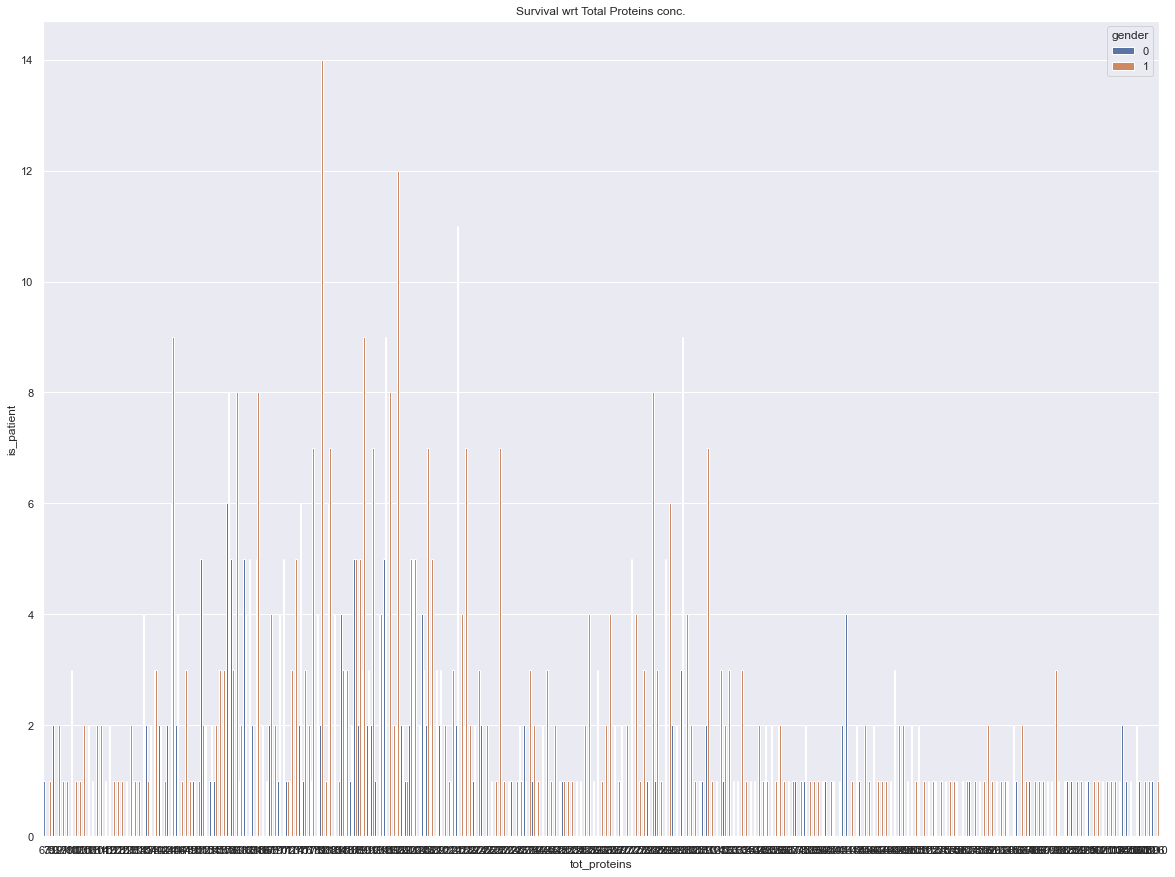

In [19]:
# Create a table for Dataset (with and without liver disease) and Total Proteins
df_liver_TP = round(df_liver[['gender', 'tot_proteins', 'is_patient']]
                    .groupby(['tot_proteins', 'gender'], as_index=False).agg(np.sum), 2)

# Generate plots to determine the effect of gender on the dataset (target feature) and total proteins
# Figure configuration
plt.figure(figsize=(20,15))

sns.barplot(x="tot_proteins", y="is_patient", hue='gender', data=df_liver_TP, ci=None)
plt.title("Survival wrt Total Proteins conc.")

Text(0.5, 1.0, 'Survival wrt Albumin Globulin Ratio')

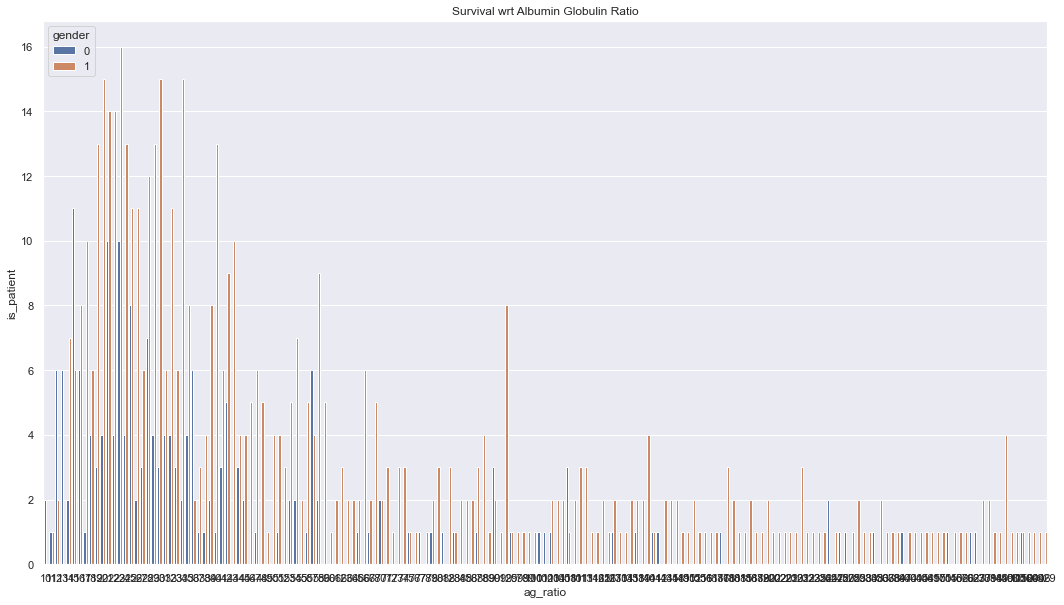

In [20]:
# Create a table for Dataset (with and without liver disease) and Alkaline Phosphatase
df_liver_ALP = round(df_liver[['gender', 'ag_ratio', 'is_patient']]
                     .groupby(['ag_ratio', 'gender'], as_index=False).agg(np.sum), 1)

# Generate plots to determine the effect of gender on the dataset (target feature) and AGR
# Figure configuration
plt.figure(figsize=(18,10))

sns.barplot(x="ag_ratio", y="is_patient", hue='gender', data=df_liver_ALP, ci=None)
plt.title("Survival wrt Albumin Globulin Ratio")

It appears from these plots that men normally have high liver function test results and hence are likely to have liver disease. This is likely because culturally men in NE of Andhra Pradesh in India consume alchohol more than women. Let us now look a dsitribution plot for all the liver function tests in relation to the target feature and gender.

# d) Distribution plots for all liver function tests

##### i- Age

Text(0.5, 1.0, 'Male')

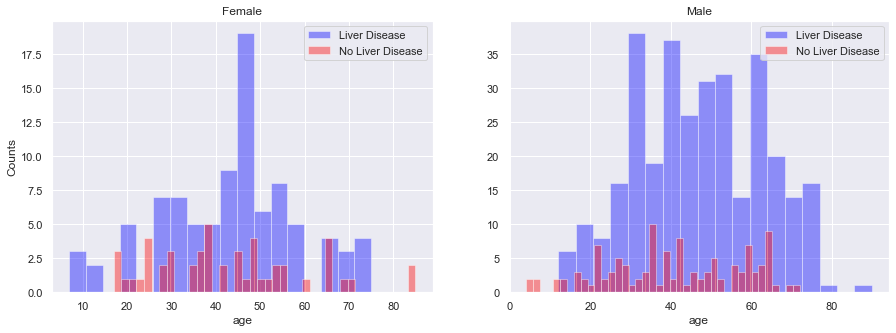

In [21]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both Age and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['age'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['age'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['age'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['age'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

This distribution plot shows some interesting things,

1)On average, women tend not to have liver disease than men.

2)The greatest number of women without liver disease were about 38 yrs old.

3)Girls around the age of 10 had liver disease, this may be a genetic link.

4)Men are more prone to liver disease (may be due to alcoholism).

5)The greatest number of men without liver diseae were about 38 yrs old.


##### ii) Total Bilirubin

Text(0.5, 1.0, 'Male')

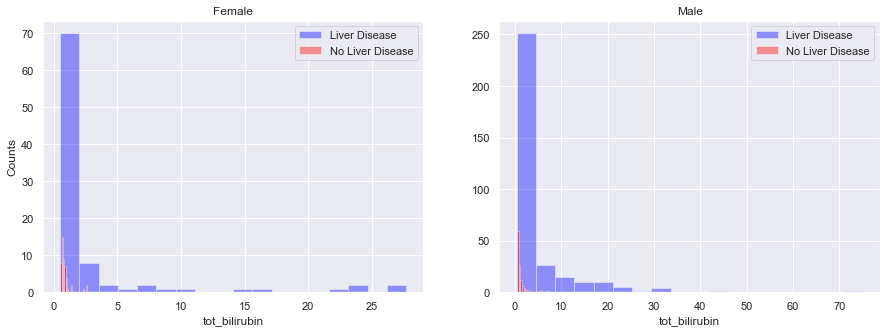

In [22]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both Total Bilirubin  and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['tot_bilirubin'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['tot_bilirubin'], 
                  bins=20, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['tot_bilirubin'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['tot_bilirubin'], 
                  bins=20, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male') 

##### iii) Direct Bilirubin

Text(0.5, 1.0, 'Male')

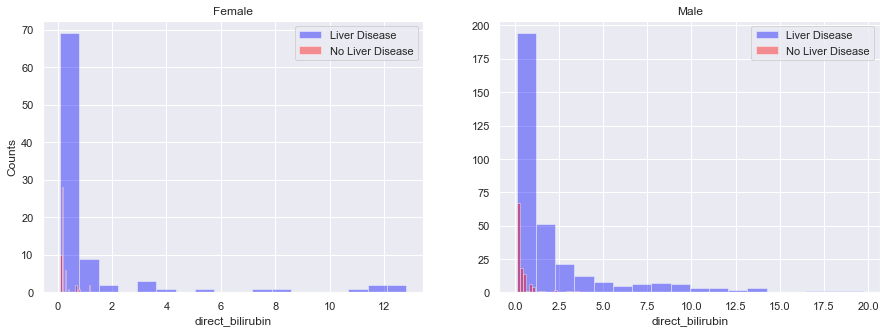

In [23]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both Direct Bilirubin  and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['direct_bilirubin'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['direct_bilirubin'], 
                  bins=20, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['direct_bilirubin'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['direct_bilirubin'], 
                  bins=20, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

##### iv) Alkaline Phosphatase

Text(0.5, 1.0, 'Male')

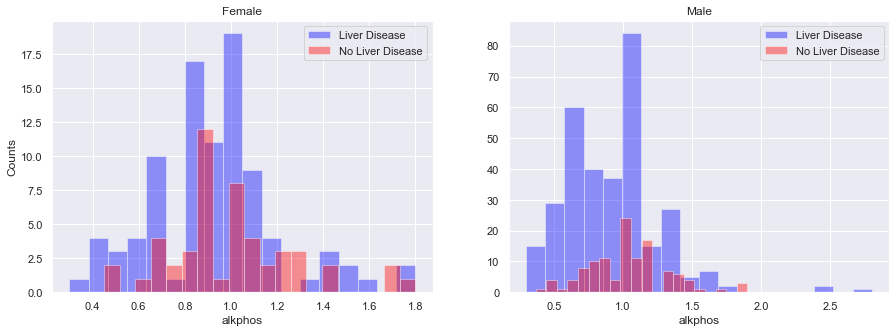

In [24]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both ALP  and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['alkphos'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['alkphos'], 
                  bins=20, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['alkphos'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['alkphos'], 
                  bins=20, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male') 

##### v) Alamine Aminotransferase

Text(0.5, 1.0, 'Male')

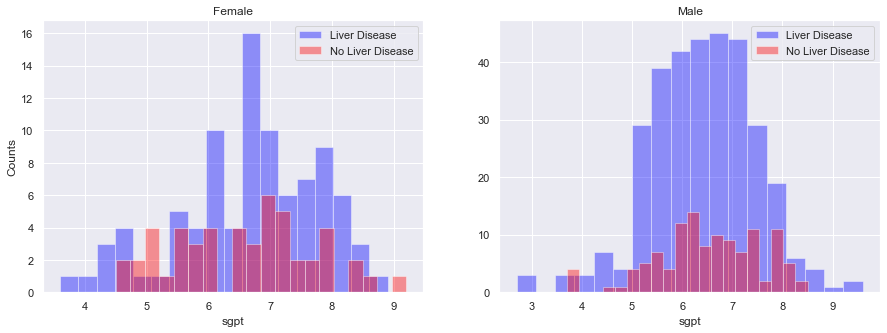

In [28]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both AAT and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['sgpt'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['sgpt'], 
                  bins=20, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['sgpt'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['sgpt'], 
                  bins=20, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male') 

##### vi) Aspartate Aminotransferase

Text(0.5, 1.0, 'Male')

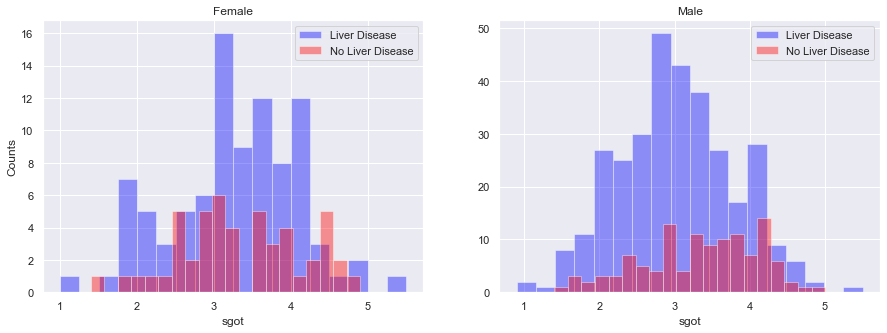

In [29]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both AAT  and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['sgot'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['sgot'], 
                  bins=20, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['sgot'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['sgot'], 
                  bins=20, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male') 

##### vii) Total Proteins

Text(0.5, 1.0, 'Male')

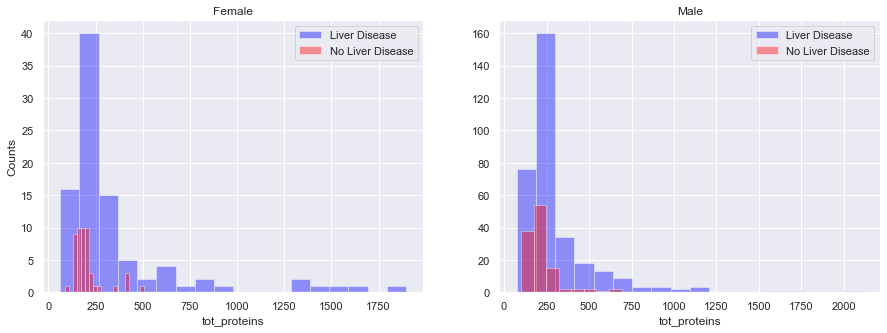

In [31]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both Total Proteins  and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['tot_proteins'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['tot_proteins'], 
                  bins=20, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['tot_proteins'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['tot_proteins'], 
                  bins=20, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male') 

##### viii) Albumin

Text(0.5, 1.0, 'Male')

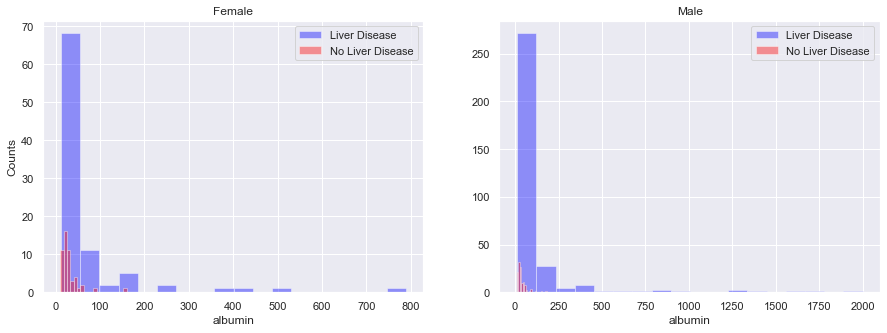

In [34]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both Albumin  and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['albumin'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['albumin'], 
                  bins=20, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['albumin'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['albumin'], 
                  bins=20, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male') 

##### x) Albumin and Globulin Ratio

Text(0.5, 1.0, 'Male')

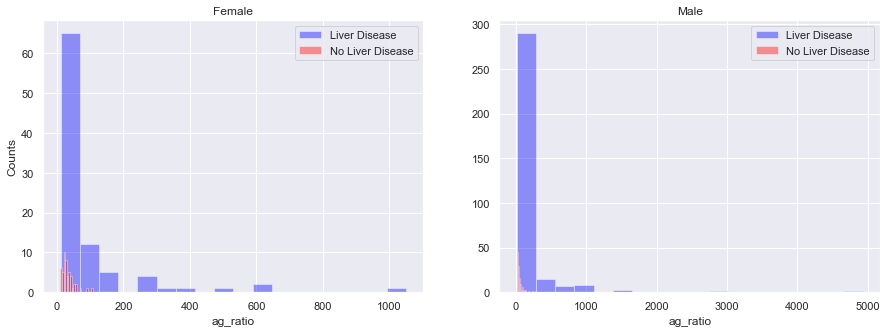

In [36]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both Albumin and Globulin Ratio  and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['ag_ratio'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['ag_ratio'], 
                  bins=20, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['ag_ratio'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['ag_ratio'], 
                  bins=20, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

# e) Applying machine learning approaches to liver disease

##### i) Simple hypothesis testing

Before delving into more complicated models, let's use a simple hyopthesis test to estimate the percentage of patients with liver disease.

In [37]:
# Create a new dataframe for the simple hypothesis testing 
df_liver_hyp = df_liver
df_liver_hyp.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [39]:
# Create a 'Hypothesis' column and set that equal to 0
df_liver_hyp['Hypothesis'] = 0

# Our hypothesis is that if the patients have liver disease then set the hypothesis column to 1
df_liver_hyp.loc[df_liver_hyp['is_patient'] == 1, 'Hypothesis'] = 1

# Next, to check if our hypothesis is correct I will create another column called Result and set that equal to 0
df_liver_hyp['Result'] = 0

# If the Dataset column agrees with our Hypothesis column, I am going to update the 'Result' column by 1.
df_liver_hyp.loc[df_liver_hyp['is_patient'] == df_liver_hyp['Hypothesis'], 'Result'] = 1

df_liver_hyp.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,Hypothesis,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1,1


In [40]:
# I will now find the percentage of passengers that have liver disease
round(df_liver_hyp['Result'].value_counts(normalize=True) * 100, 3)

1    71.355
0    28.645
Name: Result, dtype: float64

Based on the simple hypothesis test above, we find that ~ 71% of patients have liver disease. Now we can proceed to using more sophisticated machine learning models to estimate and predict liver disease in df_liver using supervised and un-supervised models. I will also be printing out the percent score and accuracy of each model.

##### ii) Machine Learning approaches

I will employ the following supervised and un-supervised machine learning models, whilst evaluating the mean accuracy of each of them by a stratified kfold cross validation procedure.


In [41]:
# Machine learning libraries in sklearn

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
# Cross validate model with Kfold stratified cross val
# K-fold cross validation: randomly splits the training set into (n_splits) 10 distinct subsets called folds, 
# then it trains and evaluates the models 10 times, picking a different fold for evaluation every time and 
# training on the other 9 folds.
K_fold = StratifiedKFold(n_splits=10)

In [43]:
# Separate train features and response
X = df_liver.drop(["is_patient", "Hypothesis", "Result"],axis = 1)
Y = df_liver["is_patient"]

# It turns out the I get the error message of reaching the total number of iterations reached the limit. 
# In this case I may need to scale the data

# Scale the data
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

# Create the Train and Test sets
# Splitting the train and test into 70% training and 30% testing
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,stratify=Y, test_size=0.3,random_state=42)


# Find the shape of all sets
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((408, 10), (408,), (175, 10), (175,))

##### Logistic regression

Logistic regression models the probabilities for classification problems with two possible outcomes. Furthermore, this models is an extension of the linear regression model but for classification problems.

In [44]:
# Logistic Regression
model_logreg = LogisticRegression()
model_logreg.fit(X_train,Y_train)
y_pred = model_logreg.predict(X_test)

scores = cross_val_score(model_logreg, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_logreg = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_logreg))
acc_logreg = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_logreg))

[0.73170732 0.73170732 0.70731707 0.68292683 0.70731707 0.68292683
 0.70731707 0.73170732 0.725      0.725     ]
Score: 71.329
Accuracy: 72.0


##### KNeighborsClassifier

This is a non-parametric test that searches for the K nearest measurements of the training data and draws a Euclidean distance. It then votes based on that information of how to classify the data.

In [45]:
# K-Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, Y_train)
y_pred = model_knn.predict(X_test)

scores = cross_val_score(model_knn, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_knn = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_knn))
acc_knn = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_knn))

[0.73170732 0.70731707 0.70731707 0.58536585 0.56097561 0.75609756
 0.63414634 0.70731707 0.725      0.6       ]
Score: 67.152
Accuracy: 65.143


##### Multi-Layer Perceptron Classifier

MLP classifier relies on an underlying Neural Network to perform the task of classification.

In [46]:
model_MLP = MLPClassifier()
model_MLP.fit(X_train, Y_train)
y_pred = model_MLP.predict(X_test)

scores = cross_val_score(model_MLP, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy' )

print(scores)
score_MLP = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_MLP))
acc_MLP = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_MLP))

[0.73170732 0.73170732 0.68292683 0.63414634 0.70731707 0.56097561
 0.73170732 0.70731707 0.7        0.75      ]
Score: 69.378
Accuracy: 71.429


##### Decision Tree Classifier

The data is continously split according to a certain parameter, in this case we are basing it on the features.

In [47]:
# Decision Tree Classifer
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, Y_train)
y_pred = model_dtc.predict(X_test)

scores = cross_val_score(model_dtc, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_dtc = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_dtc))
acc_dtc = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_dtc))

[0.70731707 0.65853659 0.65853659 0.65853659 0.68292683 0.53658537
 0.73170732 0.63414634 0.675      0.625     ]
Score: 65.683
Accuracy: 64.0


##### Random Forest Classifier

Random forest classifier creates decision trees on randomly selected data samples. The model obtains prediction from each tree and subsequently selects the best solution by means of voting. Furthermore, random forest classfier also provides a very good indicator of the feature importance.


In [48]:
# Random Forest Classifier
model_rfc = RandomForestClassifier(n_estimators=50)
model_rfc.fit(X_train, Y_train)
y_pred = model_rfc.predict(X_test)

scores = cross_val_score(model_rfc, X_train, Y_train, cv=K_fold, n_jobs=4, scoring ='accuracy')

print(scores)
score_rfc = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_rfc))
acc_rfc = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_rfc))

[0.65853659 0.73170732 0.70731707 0.65853659 0.80487805 0.58536585
 0.7804878  0.68292683 0.65       0.75      ]
Score: 70.098
Accuracy: 68.571


##### Gaussian Naive Bayes

In [49]:
# Gaussian Naive Bayes
model_gaussNB = GaussianNB()
model_gaussNB.fit(X_train, Y_train)
y_pred = model_gaussNB.predict(X_test)

scores = cross_val_score(model_gaussNB, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_gaussNB = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_gaussNB))
acc_gaussNB = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_gaussNB))

[0.51219512 0.56097561 0.68292683 0.56097561 0.6097561  0.46341463
 0.65853659 0.53658537 0.5        0.5       ]
Score: 55.854
Accuracy: 54.857


##### Support Vector Classification

The support vectors classifier tries to find the best hyperplane to separate the different features by maximizing the distance between sample points and the hyperplane.

In [50]:
# Support vector classification
model_SVC = SVC()
model_SVC.fit(X_train, Y_train)
y_pred = model_SVC.predict(X_test)

scores = cross_val_score(model_SVC, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_SVC = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_SVC))
acc_SVC = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_SVC))

[0.73170732 0.70731707 0.70731707 0.70731707 0.70731707 0.70731707
 0.70731707 0.70731707 0.725      0.725     ]
Score: 71.329
Accuracy: 71.429


##### Gradient Boosting Classifier

Gradient boosting classifiers combines many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.


In [51]:
# Gradient Boosting Classifier
model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train, Y_train)
y_pred = model_GBC.predict(X_test)

scores = cross_val_score(model_GBC, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_GBC = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_GBC))
acc_GBC = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_GBC))

[0.63414634 0.75609756 0.75609756 0.6097561  0.73170732 0.65853659
 0.82926829 0.58536585 0.75       0.825     ]
Score: 71.36
Accuracy: 64.571


##### Which is the best model?

In [52]:
results = pd.DataFrame({'Model': ['Logistic Regression','KNeighborsClassifer', 'MLP Classifier', 
                                  'Decision Tree Classifier', 'Random Forest Classifier', 'GaussianNB', 'SVC', 
                                  'GB Classifier'],
                        'Accuracy': [acc_logreg, acc_knn, acc_MLP, acc_dtc, acc_rfc, acc_gaussNB, 
                                  acc_SVC, acc_GBC], 
                        'Score': [score_logreg, score_knn, score_MLP, score_dtc, score_rfc, score_gaussNB, 
                                  score_SVC, score_GBC],})
df_results = results.sort_values(by='Score', ascending=False)
df_results = df_results.set_index('Score')
df_results

,Model,Accuracy
Score,,
71.360,GB Classifier,64.571
71.329,Logistic Regression,72.000
71.329,SVC,71.429
70.098,Random Forest Classifier,68.571
69.378,MLP Classifier,71.429
67.152,KNeighborsClassifer,65.143
65.683,Decision Tree Classifier,64.000
55.854,GaussianNB,54.857


It appears that the two best machine learning models are logistic regression and SVC as had the highest score and accuracy. Interestingly, I wasn't that far off from using the simple hypothesis testing, which gave me 71.355%. Things to consider to help improve both the score and accuracy are to introduce feature engineering and obviously more data points.

**I would really appreciate it if you anyone can comment, provide feedback and also please vote. Thank you everyone!**